In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

file_path = "/content/drive/MyDrive/IAS BOOT/cleaned_data.csv"
print(os.path.exists(file_path))  # Should print True if the file exists

True


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/IAS BOOT/cleaned_data.csv")
print(df.head())  # Check the first few row

   ALLSKY_SFC_SW_DWN  ALLSKY_KT  ALLSKY_SFC_LW_DWN  T2MDEW    TS  WS10M  \
0               1.89       0.41             306.23    4.76  8.37   5.13   
1               2.76       0.59             283.14    4.98  8.75   5.49   
2               2.97       0.63             283.28    5.41  8.37   4.77   
3               3.11       0.66             281.09    5.57  8.44   3.62   
4               3.36       0.71             274.98    2.90  8.76   3.24   

   PRECTOTCORR   RH2M  SoilMoistureIndex        Date  
0         3.61  80.38           0.043615  2013-01-03  
1         0.51  79.94           0.005879  2013-01-04  
2         0.28  82.25           0.003380  2013-01-05  
3         0.01  81.56           0.000120  2013-01-06  
4         0.00  68.75           0.000000  2013-01-07  


In [6]:
df

,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,T2MDEW,TS,WS10M,PRECTOTCORR,RH2M,SoilMoistureIndex,Date
0,1.89,0.41,306.23,4.76,8.37,5.13,3.61,80.38,0.043615,2013-01-03
1,2.76,0.59,283.14,4.98,8.75,5.49,0.51,79.94,0.005879,2013-01-04
2,2.97,0.63,283.28,5.41,8.37,4.77,0.28,82.25,0.003380,2013-01-05
3,3.11,0.66,281.09,5.57,8.44,3.62,0.01,81.56,0.000120,2013-01-06
4,3.36,0.71,274.98,2.90,8.76,3.24,0.00,68.75,0.000000,2013-01-07
...,...,...,...,...,...,...,...,...,...,...
3858,7.35,0.67,431.38,16.51,35.21,4.52,0.00,45.12,0.000000,2023-07-28
3859,7.48,0.67,433.92,11.48,37.42,5.73,0.00,33.69,0.000000,2023-07-29
3860,7.11,0.67,442.92,17.39,37.63,1.55,10.23,40.62,0.027641,2023-07-30
3861,7.34,0.67,410.23,16.79,35.37,1.86,0.00,41.38,0.000000,2023-07-31


In [5]:
df = pd.read_csv(file_path, parse_dates=["Date"])

In [9]:
features = [
    "ALLSKY_SFC_SW_DWN", "ALLSKY_KT", "ALLSKY_SFC_LW_DWN",
    "T2MDEW", "TS", "WS10M", "PRECTOTCORR", "RH2M"
]
target = "SoilMoistureIndex"  # Target variable

# Normalize features and target
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
target_scaler = MinMaxScaler()
df[target] = target_scaler.fit_transform(df[[target]])

In [10]:
import pickle

# Load the saved model
with open("/content/drive/MyDrive/IAS BOOT/lstmFinal.pkl", "rb") as file:
    model = pickle.load(file)

# Check the model architecture
print(model.summary())  # If it's a TensorFlow model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 128)              │          91,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,717 (3.35 MB)

 Trainable params: 292,905 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,812 (2.23 MB)

None


In [13]:
def create_sequences(data, features, target, seq_length=7):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[features].iloc[i:i+seq_length].values)
        y.append(data[target].iloc[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(df, features, target, seq_length)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense

# Step 1: Get the old model's weights
old_weights = model.get_weights()  # model is the loaded LSTM model

# Step 2: Define a New Model with 8 Features as Input
input_layer = Input(shape=(7, 8))  # 7 timesteps, 8 features

# Rebuild the LSTM layers
x = LSTM(50, return_sequences=True, name="lstm_1")(input_layer)
x = Dropout(0.2, name="dropout_1")(x)
x = LSTM(128, return_sequences=True, name="lstm_2")(x)
x = Dropout(0.2, name="dropout_2")(x)
x = LSTM(128, return_sequences=True, name="lstm_3")(x)
x = Dropout(0.2, name="dropout_3")(x)
x = LSTM(64, name="lstm_4")(x)

# New output layer
output_layer = Dense(1, name="dense_1")(x)

# Step 3: Create the new model
new_model = Model(inputs=input_layer, outputs=output_layer)

# Step 4: Load only matching weights
layer_names = [layer.name for layer in new_model.layers]  # Get new layer names

for old_layer, new_layer in zip(model.layers[1:], new_model.layers[1:]):  # Skip input layer
    if old_layer.name in layer_names:  # Check if layer exists in new model
        try:
            new_layer.set_weights(old_layer.get_weights())  # Transfer weights
            print(f"✅ Transferred weights for layer: {old_layer.name}")
        except ValueError:
            print(f"❌ Could not transfer weights for layer: {old_layer.name} (Shape mismatch)")

# Step 5: Compile the updated model
new_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Step 6: Check the summary
new_model.summary()

❌ Could not transfer weights for layer: dropout_2 (Shape mismatch)
❌ Could not transfer weights for layer: lstm_4 (Shape mismatch)
❌ Could not transfer weights for layer: dropout_3 (Shape mismatch)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 7, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 7, 50)               │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 7, 128)              │          91,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 7, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,505 (1.09 MB)

 Trainable params: 284,505 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Unfreeze some layers for fine-tuning
for layer in new_model.layers:
    layer.trainable = True  # Set to False if you only want to fine-tune a few layers

# Fine-tune with new data
history = new_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0017 - mae: 0.0166 - val_loss: 7.1213e-04 - val_mae: 0.0079
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0013 - mae: 0.0139 - val_loss: 7.1493e-04 - val_mae: 0.0081
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0030 - mae: 0.0181 - val_loss: 7.4861e-04 - val_mae: 0.0107
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0020 - mae: 0.0151 - val_loss: 7.1533e-04 - val_mae: 0.0108
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0016 - mae: 0.0152 - val_loss: 7.1659e-04 - val_mae: 0.0078
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0024 - mae: 0.0156 - val_loss: 6.9958e-04 - val_mae: 0.0091
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0015 - mae: 0.0153 - val_loss: 7.2037e-04 - val_mae: 0.0091
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0017 - mae: 0.0151 - val_loss: 6.8787e-04 - val_mae: 0.0097
Epoch 9/20
193/

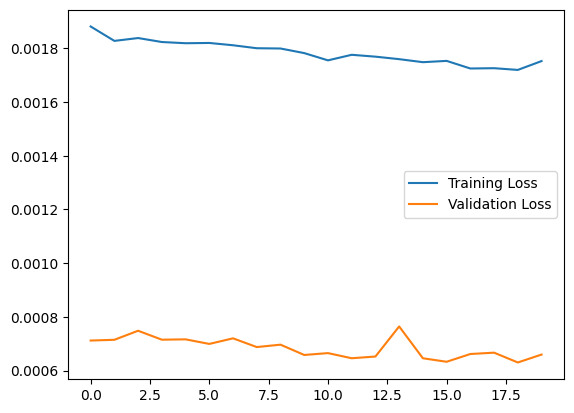

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6848e-04 - mae: 0.0081
Test Loss: 0.0006599487969651818, Test MAE: 0.008380047976970673


In [19]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_mae = new_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


In [21]:
# Save as a TensorFlow model
new_model.save("/content/drive/My Drive/IAS BOOT/fine_tuned_model.h5")

# Save as a .pkl file
with open("/content/drive/My Drive/IAS BOOT/fine_tuned_model.pkl", "wb") as file:
    pickle.dump(new_model, file)

In [22]:
df.tail()

,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,T2MDEW,TS,WS10M,PRECTOTCORR,RH2M,SoilMoistureIndex,Date
3858,0.833333,0.833333,0.908694,0.850443,0.900966,0.278002,0.000000,0.393299,0.000000,2023-07-28
3859,0.849265,0.833333,0.920023,0.664697,0.960279,0.375504,0.000000,0.251978,0.000000,2023-07-29
3860,0.803922,0.833333,0.960168,0.882939,0.965915,0.038678,0.142202,0.337661,0.040193,2023-07-30
3861,0.832108,0.833333,0.814354,0.860783,0.905260,0.063658,0.000000,0.347057,0.000000,2023-07-31
3862,0.829657,0.833333,0.796021,0.753693,0.889962,0.102337,0.000139,0.280539,0.000043,2023-08-01


In [25]:
first_day = df[features].iloc[0].values  # Extract the first row as a NumPy array

print("First day feature shape:", first_day.shape)  # Should print (8,)

First day feature shape: (8,)


In [26]:
input_data = np.tile(first_day, (7, 1))  # Shape becomes (7, 8)

# Reshape for LSTM (1, 7, 8)
input_data = input_data.reshape(1, 7, 8)

print("Final Input Shape:", input_data.shape)  # Should be (1, 7, 8)

Final Input Shape: (1, 7, 8)


In [27]:
predicted_soil_moisture = new_model.predict(input_data)

# Print predictions
print("Predicted Soil Moisture for next 7 days:", predicted_soil_moisture.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Soil Moisture for next 7 days: [0.02371968]


In [28]:
df

,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,T2MDEW,TS,WS10M,PRECTOTCORR,RH2M,SoilMoistureIndex,Date
0,0.164216,0.472222,0.350462,0.416544,0.180623,0.327156,0.050181,0.829253,0.063420,2013-01-03
1,0.270833,0.722222,0.247469,0.424668,0.190821,0.356164,0.007089,0.823813,0.008548,2013-01-04
2,0.296569,0.777778,0.248093,0.440547,0.180623,0.298147,0.003892,0.852374,0.004915,2013-01-05
3,0.313725,0.819444,0.238325,0.446455,0.182501,0.205479,0.000139,0.843843,0.000174,2013-01-06
4,0.344363,0.888889,0.211071,0.347858,0.191090,0.174859,0.000000,0.685460,0.000000,2013-01-07
...,...,...,...,...,...,...,...,...,...,...
3858,0.833333,0.833333,0.908694,0.850443,0.900966,0.278002,0.000000,0.393299,0.000000,2023-07-28
3859,0.849265,0.833333,0.920023,0.664697,0.960279,0.375504,0.000000,0.251978,0.000000,2023-07-29
3860,0.803922,0.833333,0.960168,0.882939,0.965915,0.038678,0.142202,0.337661,0.040193,2023-07-30
3861,0.832108,0.833333,0.814354,0.860783,0.905260,0.063658,0.000000,0.347057,0.000000,2023-07-31


In [33]:
FIELD_CAPACITY = 0.35  # Maximum soil moisture (m³/m³)
ROOT_DEPTH = 0.6  # Root zone depth (meters)
SOIL_TYPE_FACTOR = 1000  # Converts m³/m³ to mm
DAYS_NUM = 7  # Number of days to predict

# Compute water requirement (mm/day)
water_needed = (FIELD_CAPACITY - predicted_soil_moisture.flatten()) * ROOT_DEPTH * SOIL_TYPE_FACTOR * DAYS_NUM

# Ensure no negative values (if soil moisture is already at or above field capacity)
water_needed = np.maximum(water_needed, 0)

print("Water Needed for Next 7 Days:", water_needed[0], "mm")

Water Needed for Next 7 Days: 1370.3774 mm
